In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
import math
import random

In [8]:
# Load your dataset of cities with their coordinates
def load_dataset(filename):
    data = np.loadtxt(filename, delimiter=',')
    return data
filename = "dataset/large.csv"
cities = load_dataset(filename)
num_cities = len(cities)

In [9]:
# Calculate Euclidean distance between two cities
def distance(city1, city2):
    return np.linalg.norm(city1 - city2)

In [10]:
def nearest_neighbor_initial_route(cities, start_city):
    num_cities = len(cities)
    current_city = start_city
    unvisited_cities = set(range(num_cities))
    route = [current_city]
    unvisited_cities.remove(current_city)

    while unvisited_cities:
        nearest_city = min(unvisited_cities, key=lambda city: distance(cities[current_city], cities[city]))
        route.append(nearest_city)
        unvisited_cities.remove(nearest_city)
        current_city = nearest_city
    
    return route


In [11]:
def total_distance(route, cities):
    total = 0
    num_cities = len(route)
    for i in range(num_cities):
        total += distance(cities[route[i]], cities[route[(i+1) % num_cities]])
    total += distance(cities[route[-1]], cities[route[0]])
    return total


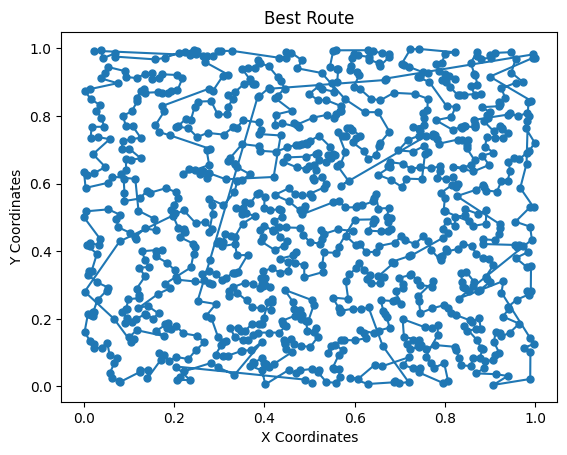

Best route found: [240, 271, 445, 279, 408, 995, 544, 931, 259, 769, 619, 31, 558, 561, 218, 312, 446, 582, 201, 253, 101, 547, 361, 808, 100, 182, 296, 333, 120, 771, 402, 586, 943, 29, 783, 444, 794, 53, 729, 691, 376, 770, 824, 93, 939, 866, 233, 637, 670, 937, 34, 343, 613, 743, 530, 323, 646, 876, 377, 634, 896, 761, 71, 685, 550, 24, 374, 928, 261, 329, 963, 437, 139, 244, 519, 295, 44, 899, 987, 242, 128, 551, 368, 265, 460, 326, 369, 413, 167, 680, 470, 777, 852, 412, 653, 727, 535, 335, 845, 946, 560, 188, 596, 658, 373, 80, 951, 110, 599, 410, 77, 819, 311, 131, 875, 592, 478, 132, 947, 855, 829, 394, 135, 462, 365, 754, 59, 804, 367, 614, 920, 310, 152, 953, 932, 773, 693, 630, 865, 694, 247, 779, 705, 858, 172, 63, 439, 812, 591, 114, 863, 944, 52, 960, 622, 27, 900, 168, 57, 885, 330, 902, 289, 818, 384, 189, 156, 505, 252, 266, 67, 997, 517, 608, 436, 833, 268, 790, 565, 466, 730, 840, 121, 358, 11, 496, 76, 755, 455, 380, 225, 288, 571, 497, 457, 17, 559, 821, 662, 226, 

In [16]:
class Particle:
    def __init__(self, initial_route):
        self.position = initial_route
        self.velocity = [0] * len(initial_route)
        self.best_position = initial_route
        self.best_fitness = total_distance(initial_route, cities)


def initialize_particles(num_particles):
    particles = []
    num_cities = len(cities)
    city_indices = list(range(num_cities))  # Create a list of city indices
    random.shuffle(city_indices)  # Shuffle the city indices

    for i in range(num_particles):
        start_city_index = city_indices[i % num_cities]  # Ensure that each particle gets a unique start city
        initial_route = nearest_neighbor_initial_route(cities, start_city_index)
        particle = Particle(initial_route)
        particles.append(particle)
    return particles



def update_velocity(particle, global_best_position, inertia_weight, cognitive_weight, social_weight):
    for i in range(len(particle.position)):
        cognitive_component = cognitive_weight * random.random() * (particle.best_position[i] - particle.position[i])
        social_component = social_weight * random.random() * (global_best_position[i] - particle.position[i])
        particle.velocity[i] = inertia_weight * particle.velocity[i] + cognitive_component + social_component


def update_position(particle):
    num_cities = len(particle.position)
    for i in range(num_cities):
        # Update position based on velocity
        particle.position[i] = (particle.position[i] + int(round(particle.velocity[i]))) % num_cities


def pso_tsp(num_particles, max_iterations, inertia_weight, cognitive_weight, social_weight):
    particles = initialize_particles(num_particles)
    global_best_position = min(particles, key=lambda p: p.best_fitness).best_position
    global_best_fitness = total_distance(global_best_position, cities)

    for _ in range(max_iterations):
        for particle in particles:
            update_velocity(particle, global_best_position, inertia_weight, cognitive_weight, social_weight)
            update_position(particle)
            current_fitness = total_distance(particle.position, cities)

            # Update personal best if necessary
            if current_fitness < particle.best_fitness:
                particle.best_fitness = current_fitness
                particle.best_position = particle.position

            # Update global best if necessary
            if current_fitness < global_best_fitness:
                global_best_fitness = current_fitness
                global_best_position = particle.position

    return global_best_position, global_best_fitness


# Example usage
filename = "dataset/large.csv"
cities = load_dataset(filename)
num_particles = 20
max_iterations = 100
inertia_weight = 0.7
cognitive_weight = 1.5
social_weight = 1.5
start_city = 2

best_route, best_distance = pso_tsp(num_particles, max_iterations, inertia_weight, cognitive_weight, social_weight)

# Save the best route and its distance
with open("best_routePSo.txt", "w") as f:
   
    f.write("Distance: {}".format(best_distance))
# Plot the best route
xs = [cities[i][0] for i in best_route]
ys = [cities[i][1] for i in best_route]

plt.plot(xs, ys, 'o-', markersize=5)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Best Route')
plt.savefig('best_routePSo.png')
plt.show()

print("Best route found:", best_route)
print("Distance of the best route:", best_distance)